# **Capstone project 2 : Facemask Detection**
In this code I have used Deep learning : CNN (Convolutional Neural Network) Model to Predict whether a Person is wearing a mask or not.

In [4]:
#Installing Libraries
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from google.colab.patches import cv2_imshow
from PIL import Image 


In [6]:
#Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#Importing the Dataset 
#API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
#Extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
mask_df = os.listdir('/content/data/with_mask')
print(mask_df[0:5])
print(mask_df[-5:])

['with_mask_206.jpg', 'with_mask_331.jpg', 'with_mask_1429.jpg', 'with_mask_3343.jpg', 'with_mask_3419.jpg']
['with_mask_2842.jpg', 'with_mask_705.jpg', 'with_mask_3352.jpg', 'with_mask_3102.jpg', 'with_mask_1473.jpg']


In [10]:
no_mask_df = os.listdir('/content/data/without_mask')
print(no_mask_df[0:5])
print(no_mask_df[-5:])

['without_mask_1171.jpg', 'without_mask_2819.jpg', 'without_mask_1583.jpg', 'without_mask_68.jpg', 'without_mask_3320.jpg']
['without_mask_1651.jpg', 'without_mask_2076.jpg', 'without_mask_3655.jpg', 'without_mask_2987.jpg', 'without_mask_3772.jpg']


In [11]:
#Performing EDA
#Checking count of images with and without mask
print('Number of images with mask :', len(mask_df))
print('Number of images without mask :', len(no_mask_df))

Number of images with mask : 3725
Number of images without mask : 3828


As we can see the data is almost balanced.

**#Creating Labels for each class**

*   1 : With Mask
*   0 : Without Mask

In [12]:
mask_labels    = [1] * 3725
no_mask_labels = [0] * 3828 

print(mask_labels[0:5])
print(no_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
#Combining the lists 
labels = mask_labels + no_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying Images**

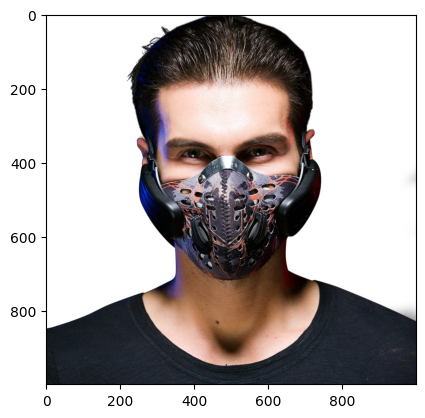

In [14]:
#Displaying image of with mask
img = mpimg.imread('/content/data/with_mask/with_mask_3332.jpg')
imgplot = plt.imshow(img)
plt.show()

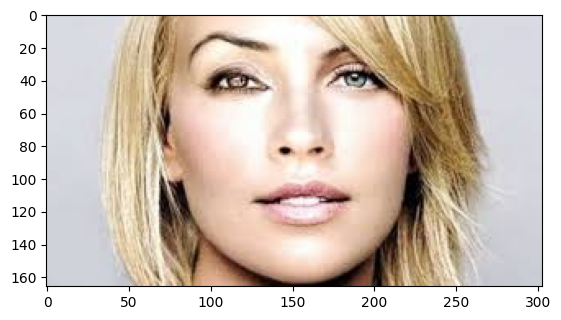

In [15]:
#Displaying image of without mask
img = mpimg.imread('/content/data/without_mask/without_mask_1095.jpg')
imgplot = plt.imshow(img)
plt.show()

As we can see the size of images are different so we need to resize the images to a standard size.

In [16]:
#Image processing
#Converting images to numpy arrays
mask_path = '/content/data/with_mask/'
no_mask_path = '/content/data/without_mask/'
data = []

#Resizing the images
for img_file in mask_df:

  image = Image.open(mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in no_mask_df:

  image = Image.open(no_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0].shape
data[1].shape

(128, 128, 3)

In [20]:
#Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)
print(Y)

(7553, 128, 128, 3)
(7553,)
[1 1 1 ... 0 0 0]


In [24]:
#Splitting the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
#Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
#X before scaling
X_train[0]

array([[[224, 223, 219],
        [224, 223, 219],
        [226, 225, 221],
        ...,
        [249, 248, 246],
        [249, 248, 246],
        [249, 248, 246]],

       [[224, 223, 219],
        [225, 224, 220],
        [227, 226, 222],
        ...,
        [249, 248, 246],
        [249, 248, 246],
        [249, 248, 246]],

       [[225, 224, 220],
        [226, 225, 221],
        [228, 227, 223],
        ...,
        [249, 248, 246],
        [249, 248, 246],
        [249, 248, 246]],

       ...,

       [[ 11,  23,  65],
        [ 11,  24,  66],
        [  5,  19,  59],
        ...,
        [ 34,  53, 127],
        [ 37,  61, 134],
        [ 41,  66, 140]],

       [[  9,  21,  60],
        [ 11,  25,  62],
        [  5,  21,  56],
        ...,
        [ 30,  43, 116],
        [ 35,  53, 125],
        [ 38,  58, 133]],

       [[ 11,  20,  61],
        [ 14,  24,  65],
        [ 12,  23,  62],
        ...,
        [ 33,  46, 120],
        [ 32,  48, 122],
        [ 39,  57, 133]]

In [27]:
#X after scaling
X_train_scaled[0]

array([[[0.87843137, 0.8745098 , 0.85882353],
        [0.87843137, 0.8745098 , 0.85882353],
        [0.88627451, 0.88235294, 0.86666667],
        ...,
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588]],

       [[0.87843137, 0.8745098 , 0.85882353],
        [0.88235294, 0.87843137, 0.8627451 ],
        [0.89019608, 0.88627451, 0.87058824],
        ...,
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588]],

       [[0.88235294, 0.87843137, 0.8627451 ],
        [0.88627451, 0.88235294, 0.86666667],
        [0.89411765, 0.89019608, 0.8745098 ],
        ...,
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588],
        [0.97647059, 0.97254902, 0.96470588]],

       ...,

       [[0.04313725, 0.09019608, 0.25490196],
        [0.04313725, 0.09411765, 0.25882353],
        [0.01960784, 0

In [28]:
#Applying Model
#Building CNN Model
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))


model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [29]:
#Compiling the neural network
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 14s 21ms/step - loss: 0.4350 - acc: 0.8052 - val_loss: 0.2682 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2801 - acc: 0.8878 - val_loss: 0.2257 - val_acc: 0.9240
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2350 - acc: 0.9045 - val_loss: 0.1991 - val_acc: 0.9273
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1934 - acc: 0.9235 - val_loss: 0.2142 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1786 - acc: 0.9329 - val_loss: 0.1785 - val_acc: 0.9405


In [30]:
#Evaluating Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2300 - acc: 0.9107
Test Accuracy = 0.9106552004814148


The model has an accuracy of approximately 91%.

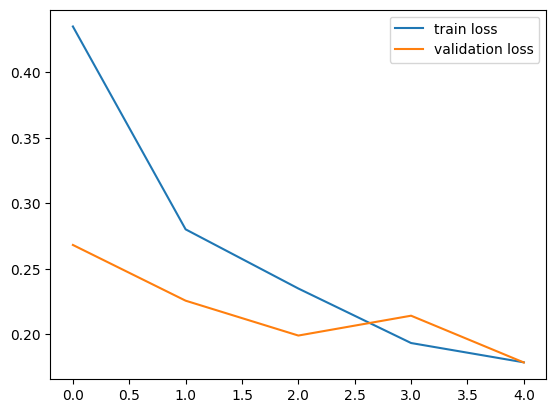

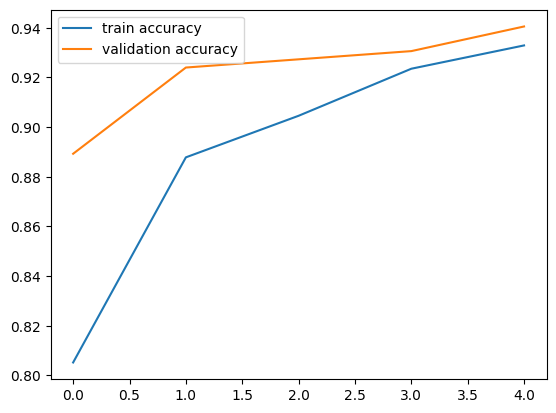

In [31]:
#Plotting graph to see the loss and accuracy of training and validation data
h = history

#Plotting the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#Plotting the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

Model is performing good now lets predict.

Path of the image to be predicted: /content/with_mask_imp.jpg


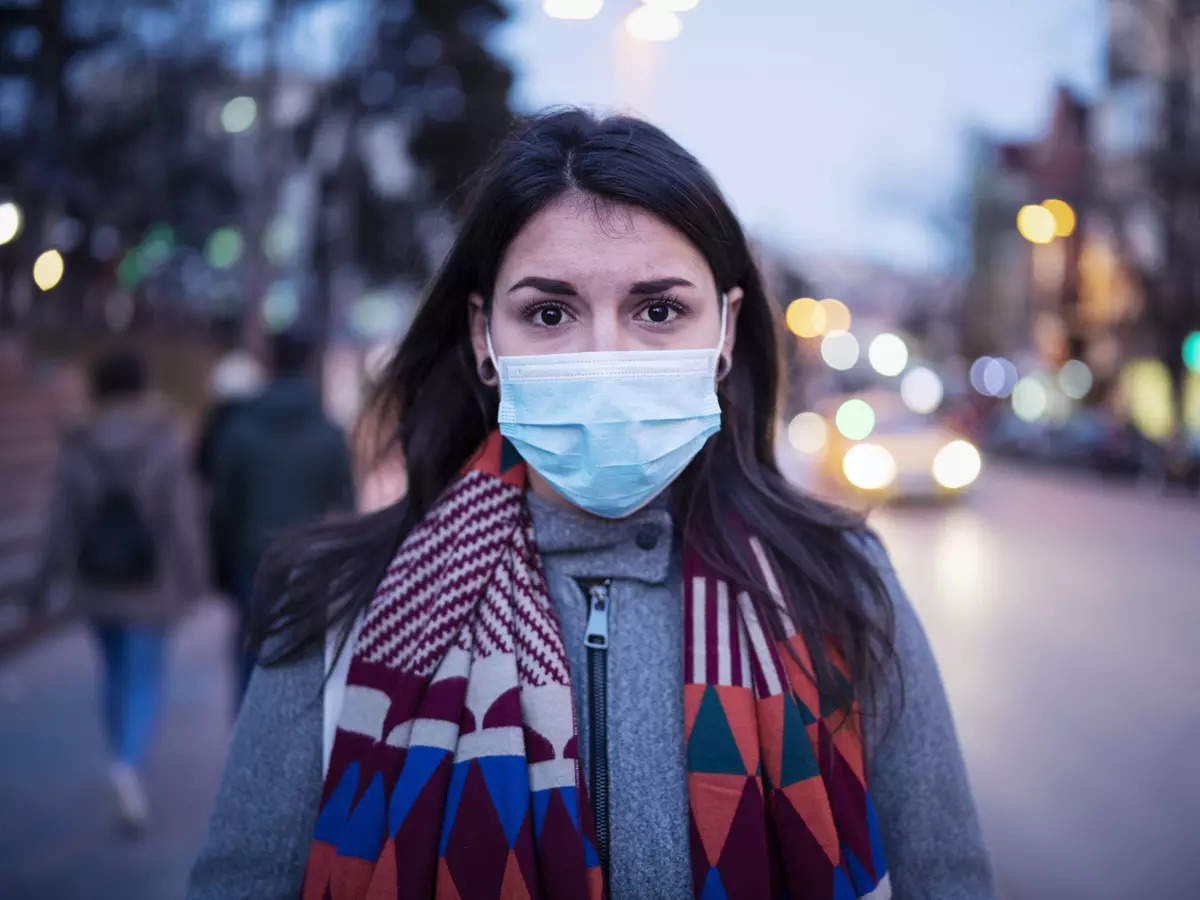

1/1 [==============================] - 0s 27ms/step
[[0.70302427 0.17153363]]
0
The person in the image is wearing a mask


In [43]:
#Making Prediction 1
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without_mask_img.jpg


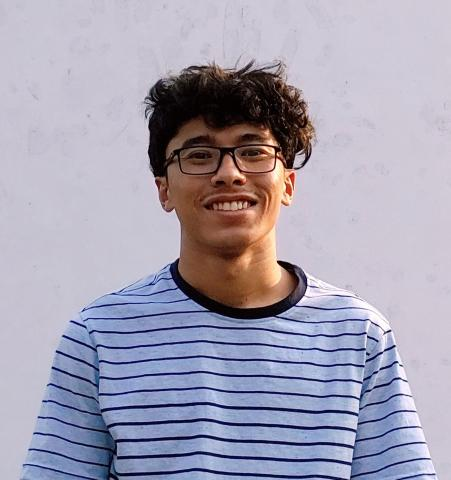

1/1 [==============================] - 0s 30ms/step
[[0.10379752 0.96195483]]
1
The person in the image is not wearing a mask


In [44]:
#Making Prediction 2
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')